# `Chi Square Distribution with plotting and Brief Explanation`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# `Purpose & Outcome:`

+ Explain Chi Distribution and how to plot using R

+ Show their relative PDF,CDF, formulas and brief explanations

**Suggested Book:** `Statistics: An Introduction using R, by Michael J. Crawley`


# `If you want to see a specific topic let me know!`

In [20]:
library(dplyr)
library(ggplot2)
library(tidyverse)
library(reshape2)
library(tidyr)
library(data.table)
set.seed(65432)


Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




# `Chi Square Distribution(s):` 

`skewed to the right, continuous`

`Chi Squared Random Variable:`
<font size=4>$V=Z^2_1+Z^2_2+...Z^2_n$ ~ $\chi^2_n$</font>, with (n) random variables with a mutually independent standard normal distribution for each $Z$

+ Since, each value of <font size=4>$Z ~ N(0,1)$</font> and they are independent then we can choose freely (n) variables with degrees of freedom.

+ Testing hypotheses about the variance of a population

+ Testing whether a population follows a specified probability distribution

+ Special case of gamma distribution


[some useful proofs](https://www.statlect.com/probability-distributions/chi-square-distribution)

# `Use Cases of Chi-Square:`

* `Estimate Confidence Intervals` from a population (std dev.) of a normal distribution for a given sample

* `Check for independence`

* `Find differences between observed and expected`

* Can use for `goodness of fit` using Chi-Sq test

The distribution is dependent upon the number of `degrees of freedom` which will be `df = (# rows-1)(# columns-1)` or `number of samples - 1`


`------------------------`

# `PDF`

<font size=5>$f(x;k) = \frac{x^{\frac{k}{2}-1} e^{-\frac{x}{2}}}{2\frac{k}{2} \Gamma \frac{k}{2}}$</font>

**`Mean:`** degrees of freedom = k

**`Standard Deviation:`** $\sqrt{(2* DegreesOfFreedom)}$


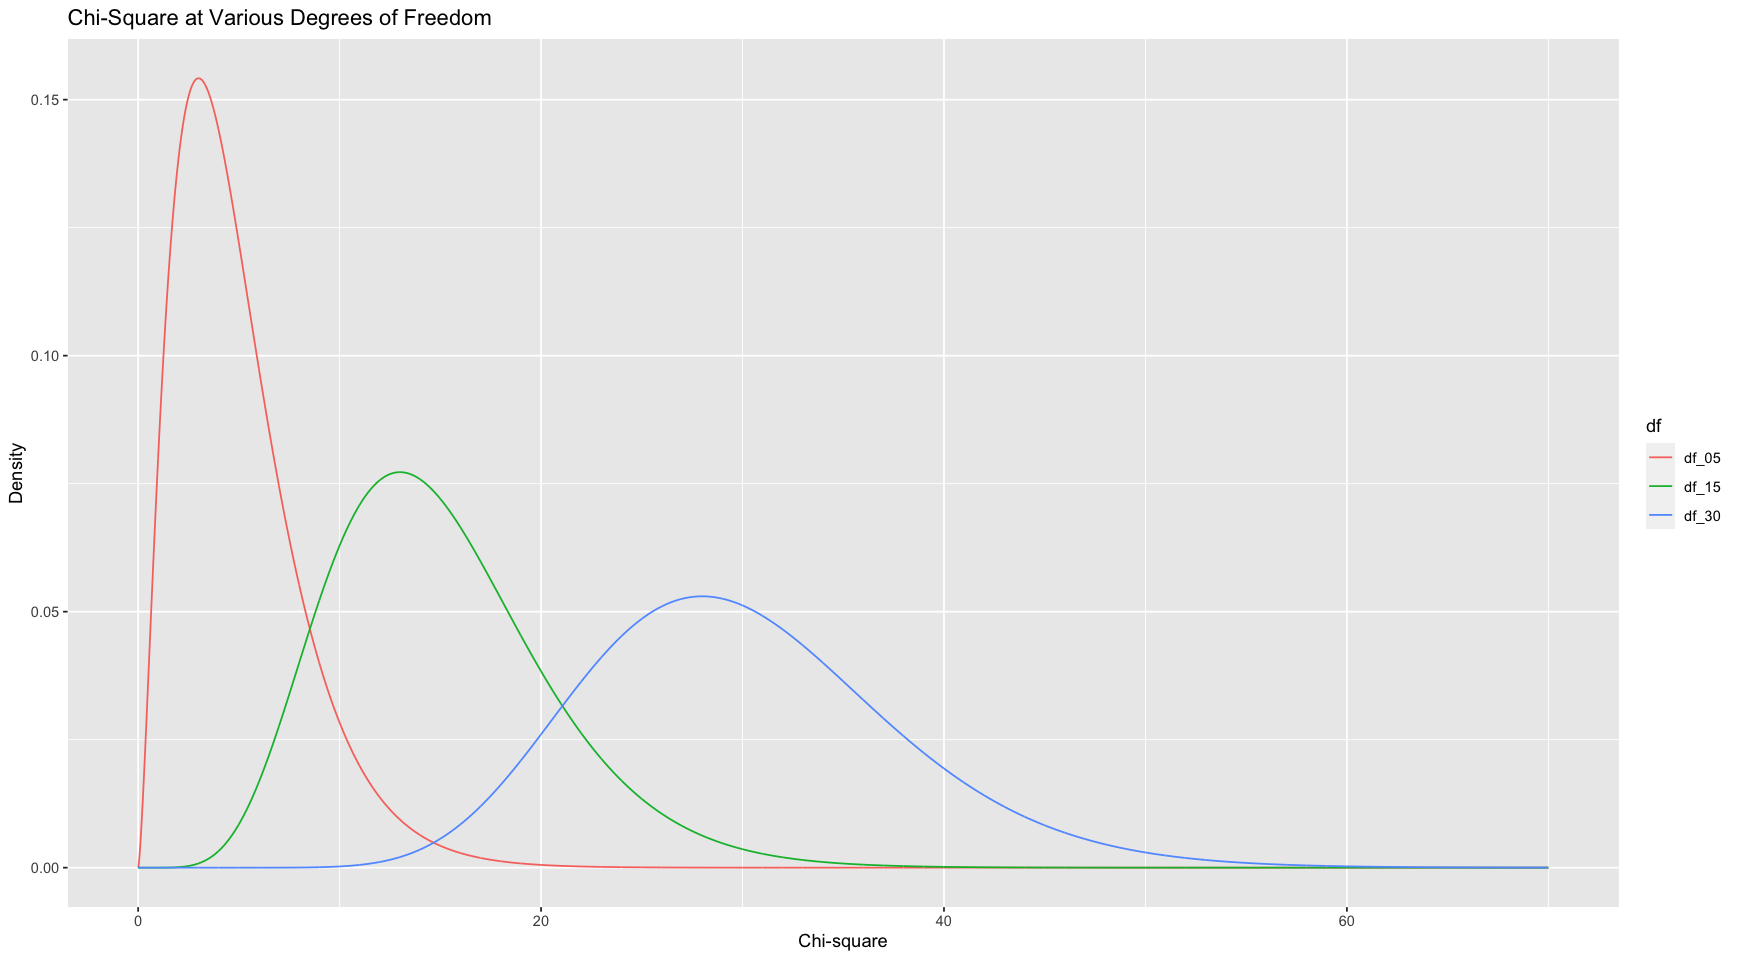

In [11]:
options(repr.plot.width=14.5, repr.plot.height=8)
data.frame(chisq = 0:7000 / 100) %>% 
           mutate(
                  df_05 = dchisq(x = chisq, df = 5),
                  df_15 = dchisq(x = chisq, df = 15),
                  df_30 = dchisq(x = chisq, df = 30)) %>%
  gather(key = "df", value = "density", -chisq) %>%
ggplot() +
  geom_line(aes(x = chisq, y = density, color = df)) +
  labs(title = "Chi-Square at Various Degrees of Freedom",
       x = "Chi-square",
       y = "Density") 

# plot from R-documentation and in citations

# `Take away from above:` 

+ as you increase the degrees of freedom, you increase the mean!

+ As you increase the degrees of freedom you approach a normal distribution


`-----------------`

# `CDF:`

+ Function whose value is the probability that a corresponding continuous random variable `has a value less than or equal` to the argument of the function [dictionary meaning] 

<font size=5>$F(x;k) = \frac{\gamma (\frac{k}{2}, \frac{x}{2}) }{\Gamma (\frac{k}{2})}$</font>, with (k) degrees of freedom

`-----------------------------`

# `Goodness of Fit:`

**For categorical data**: `1 variable`

+ **Hypothesis test**: used to evaluate if a
    + 'fit' a particular distribution or not.
    + Or fit to a fitted assumed model

+ *Assumed independence* of model when evaluating against the observed data.
    + This is always, right tailed
        + The tail will grow if the difference between observed and expected are not close

<font size=5>$\chi^2 = \sum_{k} \frac{(Observed -Expected)^2}{Expected}$</font>

**`Think of it like this`**: `"How close are the observed values to those that are expected for the fitted model."`

+ `Also, if you get a large value for this test statistic, it means that the observed and expected values were not close togehter and you will have a poor fit to the data.`

`------------------------------`

ex.) suppose you have an idea about your data and suspect it follows a binomial distribution and want to check.


[practical examples](https://courses.lumenlearning.com/introstats1/chapter/test-of-independence/)

In [ ]:
# give examples,

# `Estimate Confidence Intervals:`

Since the chi-square is not symmetric distribution we have to find the sides:

`Degrees of Freedom: (n-1)` 

`Left Critical Value` ($\chi{^2}_{Left}$): <font size=5>$\frac{1-ConfidenceLevel}{2}$</font>

`Right Critical Value`($\chi{^2}_{Right}$): <font size=5>$\frac{1+ConfidenceLevel}{2}$</font>

`Standard Deviation:` <font size=5>$\sqrt{\frac{(n-1)s^2}{\chi{^2}_{right}}<\sigma<\frac{(n-1)s^2}{\chi{^2}_{left}}}$</font>

* n = sample size
* s = sample standard deviation
* $\chi{^2}_{Left/Right}$ are the left and right bounds for your distribution

# Ex. ) Given 10 degrees of freedom, with a 95% confindence interval find the critical values

In [16]:
# Ex.) 
qchisq(c(.025,.975),df=10, lower.tail=FALSE)

# first value is right side, since lower.tail=False means start from upper portion
# second values is left side

[1] 20.483177  3.246973

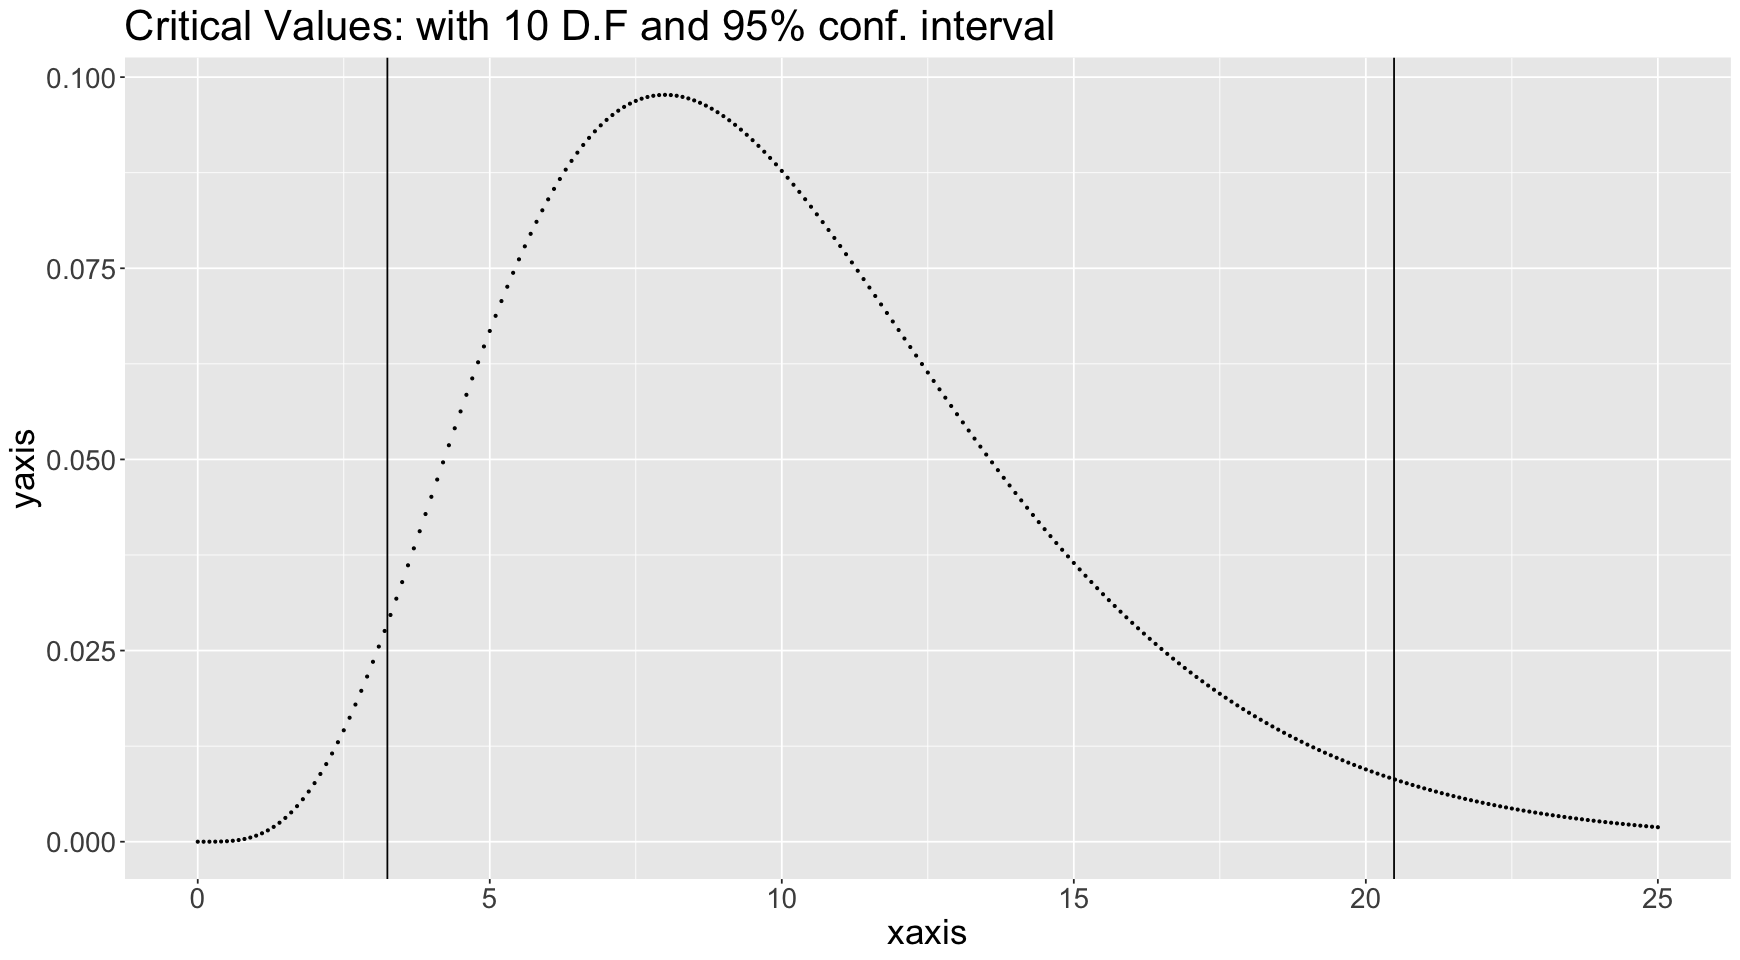

In [45]:

yaxis <- dchisq(seq(0,25,by=.1), df=10, ncp = 0, log = FALSE)
xaxis <- seq(0,25,by=.1)
SampleData<- data.table(xaxis = xaxis, yaxis=yaxis)

ggplot(SampleData, aes(xaxis,yaxis))+geom_point(size=0.5)+
#vertical at right line
geom_vline(xintercept=qchisq(.975,df=10))+
# increase font size
theme(text=element_text(size=21))+
# create vertical line left
geom_vline(xintercept=qchisq(.025,df=10))+
# title
ggtitle("Critical Values: with 10 D.F and 95% conf. interval")

# Ex. ) Find the standard deviation, given d.f.=10, confidence 95%

In [52]:
set.seed(1234)
fake_dta<-round(runif(10, min=10, max=18), digits = 2)
print('Fake data points:')
fake_dta

print('Range of standard deviation for Population should fall within this:')
c(
sqrt(((10-1)*sd(fake_dta)^2)/qchisq(c(.025),df=9, lower.tail=FALSE)),
sqrt(((10-1)*sd(fake_dta)^2)/qchisq(c(.975),df=9, lower.tail=FALSE))
)

[1] "Fake data points:"


[1] 10.91 14.98 14.87 14.99 16.89 15.12 10.08 11.86 15.33 14.11

[1] "Range of standard deviation for Population should fall within this:"


[1] 1.512283 4.013808

In [53]:
# Population Standard Deviation: does fall within our range
round(sd(fake_dta),digits=3)

[1] 2.199

# `Test for Independence:` (*`Pearsons`* *Chi-sqaure test*)


+ Are 2 or more categorical variables associated: independent (*mutually exclusive*) from each other; from a single sample.
    + Need Large sample size
    + Cannot provide inference about causation
    + DO NOT exclude any categories from your data
+ Do not use this test if your data represent 'pre/post-test' observations because this will violate independence and you will need another test such as 'McNemar's test'

**`How to think about it:`** `measuring how well the observed distribution of data fit the expected distribution of data if the varibales are independent`

**`IMPORTANT CONSIDERATION:`** The test can tell you information based on what information is provided; but, you are not able to distinguish if the categories are meaniful.


[Further clarification](https://www.ling.upenn.edu/~clight/chisquared.htm)

`Degrees of Freedom:` (number of rows - 1) * (number of columns - 1)

 `Notes:`

+ `We cannot use this test if we have: continuous or parametric data`

+ Do not put percentages or frequency counts into your grid!

`What it will tell you:`

+ The probability of independence


`What it WON'T Tell You!`

+ Doesn't tell you the relationship between data



In [ ]:
# Ex.) 



# <font color=red>LIKE</font>, Share &

# <font color=red>SUB</font>scribe

# `Citations & Help:`

`Chi Square`

https://www.itl.nist.gov/div898/handbook/eda/section3/eda3666.htm

https://www.tutorialspoint.com/statistics/chi_squared_distribution.htm

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

https://stattrek.com/probability-distributions/chi-square.aspx

https://mathworld.wolfram.com/Chi-SquaredDistribution.html

https://rpubs.com/mpfoley73/460935 (plot)

https://courses.lumenlearning.com/introstats1/chapter/goodness-of-fit-test/

https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols

https://libguides.library.kent.edu/spss/chisquare#:~:text=The%20Chi%2DSquare%20Test%20of%20Independence%20determines%20whether%20there%20is,Chi%2DSquare%20Test%20of%20Association.

https://online.stat.psu.edu/stat504/node/60/

https://www.math.csi.cuny.edu/Statistics/R/simpleR/stat013.html (code)

https://www.statlect.com/probability-distributions/chi-square-distribution

https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=2131&context=gradreports

`Confidence Intervals`

http://www3.govst.edu/kriordan/files/mvcc/math139/pdf/lfstat3e_ppt_06.pdf

https://www.colorado.edu/amath/sites/default/files/attached-files/ch7_0.pdf

http://ianmadd.github.io/pages/Confidence_Intervals_Part4.html